#### Aaron Durrence : 50071858

# Project 10: First Digits, Last Digits

## Introduction

We as humans use numbers in our daily lives all the time, from telling time to buying things that are necessary for out happiness and survival. We often use numbers without giving a second thought to the numbers themselves, and only about what they represent. For example, have you ever stopped to think if we use some numbers more than others? Do we use numbers that start with '2' more than numbers that start with the number '8'? Are numbers distributed randomly or does a pattern emerge? This project aims to answer those questions and in fact see whether some digits appear more than others as the first and last non-zero digits of numbers.

For this project, the first thing I will do is create two functions. The first will return the 1st digit of the passed argument,  $n$ , and the second will return the last digit of  $n$ . Next, I will create a function that will take in a set of data and then output two histograms to show how often each digit is the first and last digit of a number. Finally, I will read in all csv data sets given to us for the project, create the histograms of the first and last digits for each data set, and then provide some analysis on any patterns or trends I found.
 

In [14]:
# Functions Necessary for the Project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
% matplotlib inline

## Finding the First and Last Digits of Numbers

Below are two functions, 'fd($n$)' and 'ld($n$)'. Each function works the same way, first by initializing the boolean variable 'zero' as False. We then turn $n$ into a string and run a for loop through all characters of the string. This is where the functions differ; the function fd runs through the characters from left to right, while the function ld runs through the characters from right to left. If the digit is anything other than a '0', we return that digit, otherwise let zero=True and we check the next digit. If we check all the digits and the number turns out to be all zeroes we return '0' as our answer. If what we passed as $n$ to the function isn't a number at all, then the function just returns a NoneType value.

In [15]:
# Finds the first digit of the number 'n'
def fd(n):
    zero = False
    for char in str(n):
        if char.isdigit():
            if char != '0':
                return int(char)
            zero = True
    if(zero):
        return 0

In [16]:
# Finds the last digit of the number 'n'
def ld(n):
    zero = False
    for char in str(n)[::-1]:
        if char.isdigit():
            if char != '0':
                return int(char)
            zero = True
    if(zero):
        return 0

## Functions for Graphing the Data
Below are two functions that aid in graphing the data found by using the functions 'fd($n$)' and 'ld($n$)'. The first function is simply a failsafe; if something other than a number was submitted to the functions fd or ld, it returns a NoneType variable. The function 'delete_Nonetype' deletes all NoneType variables from a list and ensures that when we're trying to graph the data, we are trying to only graph numbers. The function 'graph_hist', when supplied with a list of numbers, will graph two histograms, one displaying the frequencies of the first digits of each number, and one displaying the frequencies of the last digits of each number.

In [17]:
# Gets rid of elements from the list 'data' that are NoneType
def delete_NoneType(data):
    newlist = []
    for d in data:
        if type(d) != type(None):
            newlist.append(d)
    return newlist

In [18]:
def graph_hist(data,title):
    #Plot Histogram of First Digits
    plt.subplot(211)
    plt.hist(delete_NoneType([fd(a) for a in data]), bins = 9, range=(0.5,9.5))
    plt.xlim(0.5,9.5)
    plt.xticks(range(1,10))
    plt.title('First Digit of {0}'.format(title))
    plt.xlabel('Digits')
    plt.ylabel('Frequency')
    
    #Plot Histogram of Last Digits
    plt.subplot(212)
    plt.hist(delete_NoneType([ld(a) for a in data]), bins = 9, range=(0.5,9.5))
    plt.xlim(0.5,9.5)
    plt.xticks(range(1,10))
    plt.title('Last Digit of {0}'.format(title))
    plt.xlabel('Digits')
    plt.ylabel('Frequency')
    
    #Display Graph
    plt.tight_layout()
    plt.show()

## Graphing NYSE Price Data

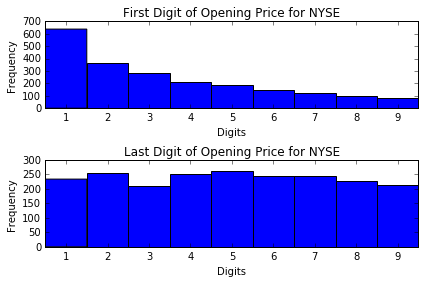

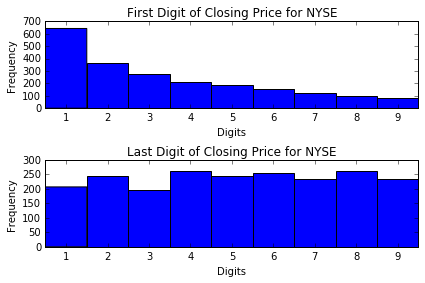

In [19]:
# New York Stock Exchange Data for a Given Day
NYSE = pd.read_csv('NYSE.csv', delimiter=',', skiprows=3, header=0, encoding='latin1')

# Opening Prices
NYSE_open = NYSE['Open'].values
graph_hist(NYSE_open,'Opening Price for NYSE')

# Closing Prices
NYSE_close = NYSE['Close'].values
graph_hist(NYSE_close,'Closing Price for NYSE')


## Graphing Area of Countries Data

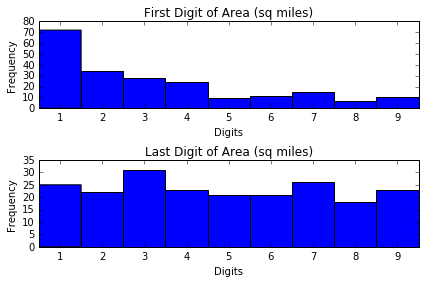

In [20]:
# Square Area of Countries
country_areas = pd.read_csv('country_areas.csv', delimiter=',', skiprows=2, header=0, encoding='latin1')

# Areas in Square Miles
country_areas_miles = country_areas['Area (sq miles)']
graph_hist(country_areas_miles,'Area (sq miles)')

## Graphing Population of Countries Data

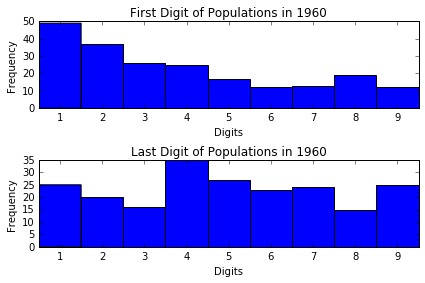

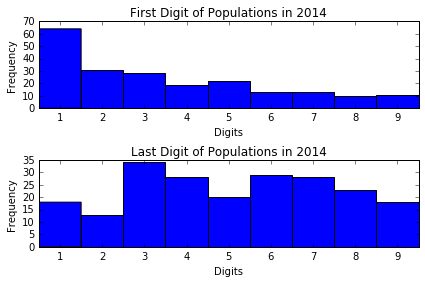

In [21]:
# Populations of Countries by Year
country_population = pd.read_csv('country_populations.csv', delimiter=',', skiprows=0, header=0, encoding='latin1')

# Populations in 1960
country_population_1960 = country_population['1960'].values
graph_hist(country_population_1960,'Populations in 1960')

# Populations in 2014
country_population_2014 = country_population['2014'].values
graph_hist(country_population_2014,'Populations in 2014')

## Graphing Elevation of Airports Data

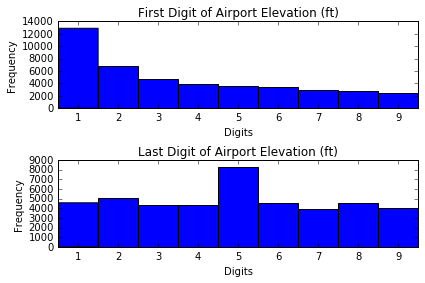

In [22]:
# Airport Census Data
airports = pd.read_csv('airports.csv', delimiter=',', skiprows=2, header=0, encoding='latin1')

# Elevation of Airports
airports_elevation = airports['elevation_ft'].values
graph_hist(airports_elevation,'Airport Elevation (ft)')

## Graphing Number of Annual Visits per Library Data

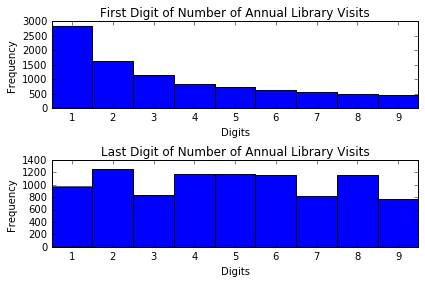

In [23]:
# Library Survey Data
library_survey = pd.read_csv('library_survey.csv', delimiter=',', skiprows=4, header=0, encoding='latin1', low_memory=False)

# Number of Annual Visits per Library
library_survey_visits = library_survey['VISITS'].values
graph_hist(library_survey_visits,'Number of Annual Library Visits')

## Graphing Distance between Capitols Data

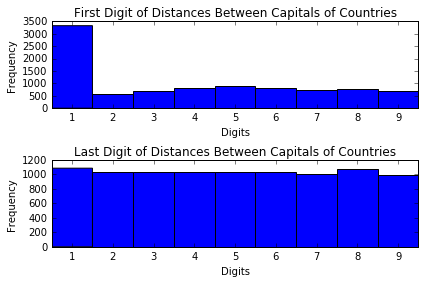

In [24]:
# Distances between Capitals of Different Countries
capital_distances = pd.read_csv('capital_distances.txt', delimiter=' ', skiprows=12, usecols=[0,1,2,3,4], header=None, encoding='latin1')

# List of Distances
capital_distances_data = capital_distances[2].values
graph_hist(capital_distances_data,'Distances Between Capitals of Countries')

## Graphing Data from all NYT Articles from June 1, 2010

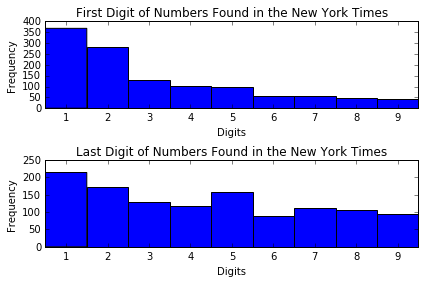

In [25]:
# New York Times Article
nyt = open('NYT.txt','r').read()

# All Numbers Found in Article
nyt_data = re.findall(r'\d+',nyt)
graph_hist(nyt_data,'Numbers Found in the New York Times')

## Analyzing the Data
Let us first analyze trends found in the first digit histograms. After observing all 7 sources, a trend emerges among the first digits of numbers. Nearly every graph shows a decreasing trend starting at 1 and going to 9. Clearly 1 is the most common number by far, typically doubling the next highest number in each graph. It is quite apparent that the distribution of first digits is not arranged randomly, but in fact appears to follow a negative logarithmic distribution.

If we now turn to the last digit histograms, unfortunately no clear pattern seems to emerge. The distribution of digits appears to be random, with no digit claiming victory a significant number of times. It's worth noting that 5 sometimes appears more commonly than the rest, but this is due to rounding to the nearest half integer.